In [ ]:
# 5.⁠ ⁠⁠For vol test combo of 1 year NSE Ivol and 1 year down vol 50:50 ( might have some edge )
# 6.⁠ ⁠⁠Down vol + 1 year nse I vol + low beta combo 33:33:33 testing - as vol factor

In [1]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
import math
from datetime import date, timedelta, datetime
import time
from tqdm import tqdm
import seaborn as sns
from scipy import stats
import xlsxwriter
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages
start_time = time.perf_counter()

In [2]:
price_data = pd.read_csv('stockPriceData-2.csv')
# etf_indices = pd.read_csv('.csv')
# price_data = price_data[~(price_data['Symbol'].isin(etf_indices['Symbol']))]
price_data_500 = price_data.groupby('Date', group_keys=False).apply(lambda x: x.sort_values(by='Mcap', ascending=False).head(500))
df = price_data[price_data['Symbol'].isin(price_data_500['Symbol'])]
df['Date'] = pd.to_datetime(df['Date'])
master_date = df.drop_duplicates(subset='Date')[['Date']].reset_index(drop=True)
df.set_index('Date', inplace=True)

# Step 1: Sort by Date and descending Mcap (higher Mcap = rank 1)
df = df.sort_values(by=['Date', 'Mcap'], ascending=[True, False])

# Step 2: Create daily rank
df['Daily_Mcap_Rank'] = df.groupby('Date')['Mcap'].rank(method='first', ascending=False)

# Step 3: Define classification function
def classify_mcap(rank):
    if rank <= 100:
        return 'Large'
    elif rank <= 250:
        return 'Mid'
    else:
        return 'Small'

# Step 4: Apply classification
df['Mcap_Category'] = df['Daily_Mcap_Rank'].apply(classify_mcap)
df = df.sort_values(['Symbol', 'Date'])
df['PrevClose'] = df.groupby('Symbol')['Close'].shift(1)
df['returns'] = (df['Close'] - df['PrevClose']) / df['PrevClose']

In [4]:
# price_data = pd.read_csv('stockPriceData-3.csv')
# price_data_500 = price_data.groupby('Date', group_keys=False).apply(lambda x: x.sort_values(by='Mcap', ascending=False).head(500))
# df = price_data_500.copy()
# df['Date'] = pd.to_datetime(df['Date'])

# master_date = df.drop_duplicates(subset='Date')[['Date']].reset_index(drop=True)
# df.set_index('Date', inplace=True)

# # Step 1: Sort by Date and descending Mcap (higher Mcap = rank 1)
# df = df.sort_values(by=['Date', 'Mcap'], ascending=[True, False])

# # Step 2: Create daily rank
# df['Daily_Mcap_Rank'] = df.groupby('Date')['Mcap'].rank(method='first', ascending=False)

# # Step 3: Define classification function
# def classify_mcap(rank):
#     if rank <= 100:
#         return 'Large'
#     elif rank <= 250:
#         return 'Mid'
#     else:
#         return 'Small'

# # Step 4: Apply classification
# df['Mcap_Category'] = df['Daily_Mcap_Rank'].apply(classify_mcap)
# df = df.sort_values(['Symbol', 'Date'])
# df['PrevClose'] = df.groupby('Symbol')['Close'].shift(1)
# df['returns'] = (df['Close'] - df['PrevClose']) / df['PrevClose']

In [8]:
dividend =  pd.read_csv('Appender_latest-3.csv')
dividend = dividend[['Date', 'Symbol','Dividend','DownVol','ValueABS']]

dividend['Date'] = pd.to_datetime(dividend['Date'])
dividend = pd.merge(dividend, df[['Symbol','Mcap','Mcap_Category']], on=['Date','Symbol'])
dividend = dividend.groupby('Date', group_keys=False).apply(lambda x: x.sort_values(by='Mcap', ascending=False).head(250))

dividend

,Date,Symbol,Dividend,DownVol,ValueABS,Mcap,Mcap_Category
298,2006-01-03,ONGC,NaN,0.917275,NaN,1.726521e+06,Large
337,2006-01-03,RELIANCE,NaN,0.980535,NaN,1.282027e+06,Large
293,2006-01-03,NTPC,NaN,0.944039,NaN,9.243166e+05,Large
412,2006-01-03,TCS,NaN,0.802920,NaN,8.321350e+05,Large
205,2006-01-03,INFY,NaN,0.929440,NaN,8.254697e+05,Large
...,...,...,...,...,...,...,...
2288387,2025-06-13,EXIDEIND,0.521368,0.613108,0.633977,3.271225e+05,Mid
2288567,2025-06-13,NBCC,0.217949,0.181818,0.321783,3.257280e+05,Mid
2288610,2025-06-13,POONAWALLA,0.080128,0.276956,0.258468,3.242504e+05,Small
2288424,2025-06-13,GUJGASLTD,0.769231,0.668076,0.676886,3.233024e+05,Small


In [5]:
dividend =  pd.read_csv('Appender_latest-3.csv')
dividend = dividend[['Date', 'Symbol','Dividend']]
dividend['Date'] = pd.to_datetime(dividend['Date'])
dividend = pd.merge(dividend, df[['Symbol','Mcap','Mcap_Category']], on=['Date','Symbol'])
dividend = dividend.groupby('Date', group_keys=False).apply(lambda x: x.sort_values(by='Mcap', ascending=False).head(250))
dividend['Date'] = pd.to_datetime(dividend['Date'])
top_50a = (
    dividend[['Date', 'Symbol', 'Dividend']]
      .sort_values(['Date', 'Dividend'], ascending=[True, False])
      .groupby('Date')
      .head(50)
      .reset_index(drop=True)
)
top_50a['Date'] = pd.to_datetime(top_50a['Date'])
top_50a

,Date,Symbol,Dividend
0,2006-01-03,ONGC,NaN
1,2006-01-03,RELIANCE,NaN
2,2006-01-03,NTPC,NaN
3,2006-01-03,TCS,NaN
4,2006-01-03,INFY,NaN
...,...,...,...
239845,2025-06-13,LICHSGFIN,0.844017
239846,2025-06-13,BOSCHLTD,0.841880
239847,2025-06-13,GLAXO,0.839744
239848,2025-06-13,GILLETTE,0.837607


In [ ]:
# dividend['AntiValueABS'] = 1 - dividend['ValueABS']
# dividend

,Date,Symbol,Dividend,DownVol,ValueABS,Mcap,Mcap_Category,AntiValueABS
298,2006-01-03,ONGC,NaN,0.917073,NaN,1.726521e+06,Large,NaN
337,2006-01-03,RELIANCE,NaN,0.980488,NaN,1.282027e+06,Large,NaN
293,2006-01-03,NTPC,NaN,0.943902,NaN,9.243166e+05,Large,NaN
411,2006-01-03,TCS,NaN,0.804878,NaN,8.321350e+05,Large,NaN
205,2006-01-03,INFY,NaN,0.929268,NaN,8.254697e+05,Large,NaN
...,...,...,...,...,...,...,...,...
2272270,2025-06-04,GUJGASLTD,0.781857,0.680761,0.799504,3.261937e+05,Mid,0.200496
2272250,2025-06-04,GILLETTE,0.777538,0.818182,0.413979,3.241252e+05,Mid,0.586021
2272102,2025-06-04,AJANTPHARM,0.099352,0.553911,0.555101,3.230727e+05,Mid,0.444899
2272394,2025-06-04,MEDANTA,0.099352,0.691332,0.362735,3.215596e+05,Small,0.637265


In [11]:
# Filter only Small Cap entries
small_caps = dividend[dividend['Mcap_Category'] == 'Small']

# Count number of Small Caps per day
small_caps_count = small_caps.groupby('Date').size().reset_index(name='SmallCap_Count')

# Optional: Save the result
small_caps_count.to_csv("small_caps_count_per_day.csv", index=False)

# Display first few rows
print(small_caps_count.head())

        Date  SmallCap_Count
0 2006-01-03              18
1 2006-01-04              18
2 2006-01-05              18
3 2006-01-06              18
4 2006-01-09              19


In [12]:
small_caps_count.tail(50)

,Date,SmallCap_Count
4740,2025-03-20,3
4741,2025-03-21,3
4742,2025-03-24,3
4743,2025-03-25,3
4744,2025-03-26,3
4745,2025-03-27,3
4746,2025-03-28,3
4747,2025-04-01,2
4748,2025-04-02,2
4749,2025-04-03,3


In [9]:
# top_50a = (
#     dividend[['Date', 'Symbol', 'Dividend','Growth','DownVol']]
#       .sort_values(['Date', 'Dividend'], ascending=[True, False])
#       .groupby('Date')
#       .head(100)
#       .reset_index(drop=True)
# )
# top_50a['Date'] = pd.to_datetime(top_50a['Date'])
# top_50a

top_50a = (
    dividend[['Date', 'Symbol', 'Dividend','DownVol','ValueABS']]
      .sort_values(['Date', 'Dividend'], ascending=[True, False])
      .groupby('Date')
      .head(100)
      .reset_index(drop=True)
)
top_50a['Date'] = pd.to_datetime(top_50a['Date'])
top_50a

,Date,Symbol,Dividend,DownVol,ValueABS
0,2006-01-03,ONGC,NaN,0.917275,NaN
1,2006-01-03,RELIANCE,NaN,0.980535,NaN
2,2006-01-03,NTPC,NaN,0.944039,NaN
3,2006-01-03,TCS,NaN,0.802920,NaN
4,2006-01-03,INFY,NaN,0.929440,NaN
...,...,...,...,...,...
479695,2025-06-13,TATACONSUM,0.634615,0.913319,0.453137
479696,2025-06-13,GODFRYPHLP,0.632479,0.052854,0.427372
479697,2025-06-13,ABB,0.630342,0.372093,0.492814
479698,2025-06-13,CDSL,0.623932,0.329810,0.261914


In [14]:


# dividend =  pd.read_csv('Full_appender-2.csv')
# dividend = dividend[['Date', 'Symbol','Dividend','LTMA']]
# dividend['Date'] = pd.to_datetime(dividend['Date'])

# top_50a = (
#     dividend[['Date', 'Symbol', 'Dividend','LTMA']]
#       .sort_values(['Date', 'Dividend'], ascending=[True, False])
#       .groupby('Date')
#       .head(100)
#       .reset_index(drop=True)
# )

# top_50a['Date'] = pd.to_datetime(top_50a['Date'])
# top_50a

In [15]:
# top_50a = top_50a.dropna()

In [16]:
# # Assuming your DataFrame is named df
# top_50a['MeanScore'] = top_50a[['Growth', 'DownVol']].mean(axis=1)
# top_50a

In [10]:
# # Function to get top 25 by Growth and DownVol for each date
# def get_top_25(df):
#     top_growth = df.sort_values(['Date', 'Growth'], ascending=[True, False])\
#                    .groupby('Date').head(25)\
#                    .assign(RankType='TopGrowth')

#     top_downvol = df.sort_values(['Date', 'DownVol'], ascending=[True, False])\
#                     .groupby('Date').head(25)\
#                     .assign(RankType='TopDownVol')

#     return pd.concat([top_growth, top_downvol]).reset_index(drop=True)

# # Apply function
# top_25_combined = get_top_25(top_50a)
# top_25_combined

# Function to get top 25 by Growth and DownVol for each date
def get_top_25(df):
    top_growth = df.sort_values(['Date', 'DownVol'], ascending=[True, False])\
                   .groupby('Date').head(25)\
                   .assign(RankType='TopDownVol')

    top_downvol = df.sort_values(['Date', 'ValueABS'], ascending=[True, False])\
                    .groupby('Date').head(25)\
                    .assign(RankType='TopValueABS')

    return pd.concat([top_growth, top_downvol]).reset_index(drop=True)

# Apply function
top_25_combined = get_top_25(top_50a)
top_25_combined

,Date,Symbol,Dividend,DownVol,ValueABS,RankType
0,2006-01-03,ASIANPAINT,NaN,0.995134,NaN,TopDownVol
1,2006-01-03,TATACONSUM,NaN,0.990268,NaN,TopDownVol
2,2006-01-03,BOSCHLTD,NaN,0.987835,NaN,TopDownVol
3,2006-01-03,INDHOTEL,NaN,0.982968,NaN,TopDownVol
4,2006-01-03,RELIANCE,NaN,0.980535,NaN,TopDownVol
...,...,...,...,...,...,...
239845,2025-06-13,HINDPETRO,0.931624,0.435518,0.795320,TopValueABS
239846,2025-06-13,GAIL,0.985043,0.608879,0.793383,TopValueABS
239847,2025-06-13,HUDCO,0.786325,0.145877,0.792608,TopValueABS
239848,2025-06-13,NMDC,0.801282,0.384778,0.785795,TopValueABS


In [11]:
top_25_combined[top_25_combined['Date'] == '2025-06-04']

,Date,Symbol,Dividend,DownVol,ValueABS,RankType
119725,2025-06-04,NESTLEIND,0.750542,1.000000,0.328591,TopDownVol
119726,2025-06-04,HINDUNILVR,0.906725,0.993684,0.594027,TopDownVol
119727,2025-06-04,SUNPHARMA,0.691974,0.991579,0.318523,TopDownVol
119728,2025-06-04,ICICIBANK,0.633406,0.989474,0.612681,TopDownVol
119729,2025-06-04,ITC,0.963124,0.987368,0.685009,TopDownVol
119730,2025-06-04,HDFCBANK,0.739696,0.985263,0.635134,TopDownVol
119731,2025-06-04,DRREDDY,0.880694,0.983158,0.669314,TopDownVol
119732,2025-06-04,TCS,0.971800,0.981053,0.593785,TopDownVol
119733,2025-06-04,MARUTI,0.735358,0.972632,0.603458,TopDownVol
119734,2025-06-04,PGHH,0.854664,0.970526,0.459523,TopDownVol


In [13]:
# x = top_50a.dropna()
# x = (
#     x[['Date', 'Symbol', 'DownVol','LTMA']]
#       .sort_values(['Date', 'DownVol'], ascending=[True, False])
#       .groupby('Date')
#       .head(100)
#       .reset_index(drop=True)
# )
# # === Output Top 25 ===
# x

In [14]:
# new = top_50a.dropna()
# new = (
#     new[['Date', 'Symbol', 'MeanScore']]
#       .sort_values(['Date', 'MeanScore'], ascending=[True, False])
#       .groupby('Date')
#       .head(50)
#       .reset_index(drop=True)
# )
# # === Output Top 25 ===
# new

In [6]:
top_50a = top_50a.dropna()
top_50a

,Date,Symbol,Dividend
5100,2006-06-06,FINCABLES,1.000000
5101,2006-06-06,HAVELLS,0.995000
5102,2006-06-06,EIDPARRY,0.987500
5103,2006-06-06,SANOFI,0.982500
5104,2006-06-06,GHCL,0.977500
...,...,...,...
239845,2025-06-13,LICHSGFIN,0.844017
239846,2025-06-13,BOSCHLTD,0.841880
239847,2025-06-13,GLAXO,0.839744
239848,2025-06-13,GILLETTE,0.837607


In [7]:
master_date = master_date.sort_values(by='Date')
portfolio = top_50a.groupby("Date")["Symbol"].apply(list).reset_index()

# Expand portfolio by date
merged = pd.merge_asof(master_date, portfolio, on="Date")

merged = merged.explode("Symbol").dropna(subset=["Symbol"])
merged = merged[merged["Date"]>= '2006-06-19'].reset_index(drop=True)
# Define the start date (it should start from 2006-06-19)
start_date = pd.to_datetime('2006-06-19')

# Filter the dates starting from 2006-06-19 (this ensures the start date is included)
filtered_dates = master_date[master_date['Date'] >= start_date]

# Ensure the start date is included
start_date_row = filtered_dates[filtered_dates['Date'] == start_date]

# Select every 50th date from the filtered dates (starting from the filtered list after the start date)
selected_dates = filtered_dates.iloc[::21*13]

# Combine the start date with the selected dates
selected_dates = pd.concat([start_date_row, selected_dates])

# Drop any NaN values and sort by date to ensure it's in the correct order
selected_dates = selected_dates.dropna().sort_values(by='Date')

combined_dates_portfolio = merged[merged['Date'].isin(selected_dates['Date'])]
combined_dates_portfolio

,Date,Symbol
0,2006-06-19,HAVELLS
1,2006-06-19,CRISIL
2,2006-06-19,EIDPARRY
3,2006-06-19,SANOFI
4,2006-06-19,GHCL
...,...,...
232095,2025-04-08,SBIN
232096,2025-04-08,HDFCAMC
232097,2025-04-08,DABUR
232098,2025-04-08,CONCOR


In [8]:
# Assuming your DataFrame is called `df` and has columns ['Date', 'Symbol']
combined_dates_portfolio['Date'] = pd.to_datetime(combined_dates_portfolio['Date'])

# Step 1: Count occurrences per (Date, Symbol)
weight_df = combined_dates_portfolio.groupby(['Date', 'Symbol']).size().reset_index(name='Count')

# Step 2: Compute total count per date
weight_df['Total_Count'] = weight_df.groupby('Date')['Count'].transform('sum')

# Step 3: Compute proportional weight
weight_df['Weight'] = weight_df['Count'] / weight_df['Total_Count']

# Step 4: Final columns
final_weights = weight_df[['Date', 'Symbol', 'Weight']]
final_weights

,Date,Symbol,Weight
0,2006-06-19,ABB,0.02
1,2006-06-19,ACC,0.02
2,2006-06-19,AMBUJACEM,0.02
3,2006-06-19,BAJAJHLDNG,0.02
4,2006-06-19,BHEL,0.02
...,...,...,...
895,2025-04-08,TCS,0.02
896,2025-04-08,TECHM,0.02
897,2025-04-08,UNIONBANK,0.02
898,2025-04-08,VEDL,0.02


In [8]:
final_weights['Weight'].max()

np.float64(0.02)

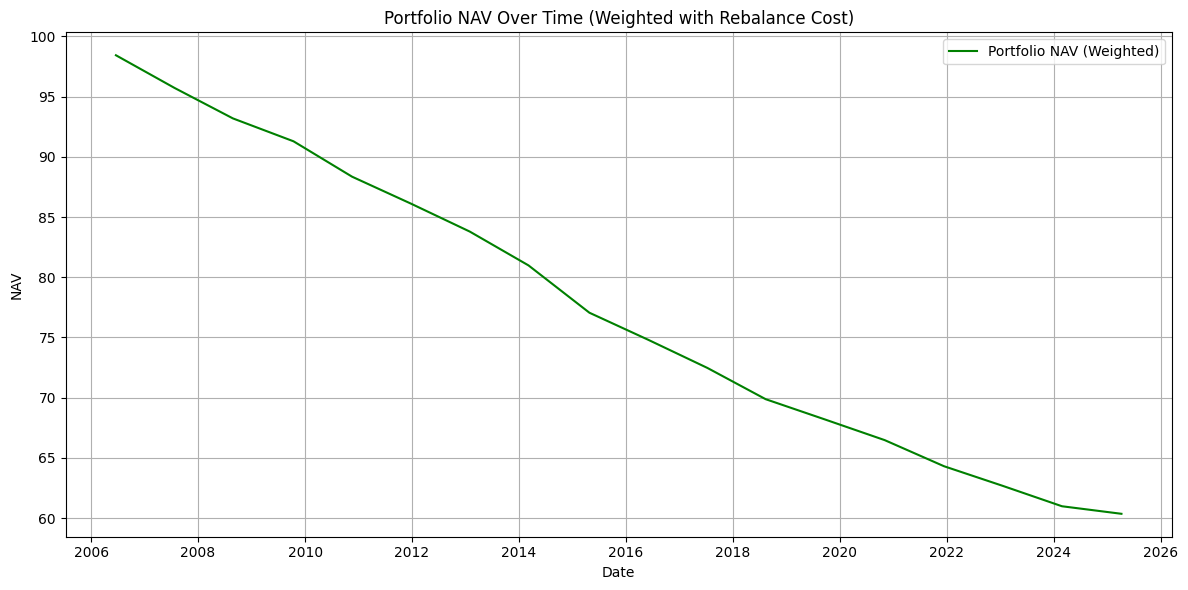

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure all Date columns are datetime
# returns_df['Date'] = pd.to_datetime(returns_df['Date'])
final_weights['Date'] = pd.to_datetime(final_weights['Date'])
selected_dates['Date'] = pd.to_datetime(selected_dates['Date'])

# Step 2: Merge returns and weights
merged = pd.merge(df, final_weights, on=['Date', 'Symbol'], how='inner')  # use 'inner' to avoid missing values

# Step 3: Ensure weights are normalized per date
merged['Weight'] = merged.groupby('Date')['Weight'].transform(lambda x: x / x.sum())

# Step 4: Compute weighted return for each stock
merged['weighted_return'] = merged['returns'] * merged['Weight']

# Step 5: Compute daily portfolio return
daily_returns = merged.groupby('Date')['weighted_return'].sum()

# Step 6: Apply transaction cost on rebalance dates
rebalance_dates = selected_dates['Date'].tolist()
daily_returns.loc[daily_returns.index.isin(rebalance_dates)] -= 0.03  # Subtract 3%

# Step 7: Compute NAV (start at 100)
nav = (1 + daily_returns).cumprod() * 100

# Step 8: Plot NAV
plt.figure(figsize=(12, 6))
plt.plot(nav.index, nav.values, label='Portfolio NAV (Weighted)', color='green')
plt.title('Portfolio NAV Over Time (Weighted with Rebalance Cost)')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
# Make sure 'Date' is a column, not index
df_reset = df.reset_index()

# Merge with returns
merged = pd.merge(merged, df_reset[["Date", "Symbol", "returns"]], on=["Date", "Symbol"], how="left")

# Compute NAV (average return across stocks each date)
nav = merged.groupby("Date")["returns"].mean()

# Apply rebalance cost on rebalance dates
rebalance_dates = pd.to_datetime(selected_dates['Date']).tolist()
nav.loc[nav.index.isin(rebalance_dates)] -= 0.03

# Step 1: Compute NAV
nav = (1 + nav).cumprod() * 100

# Step 2: Plot NAV
plt.figure(figsize=(12, 6))
plt.plot(nav.index, nav.values, label='NAV', color='blue')
plt.title('Portfolio NAV Over Time')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'Column not found: returns'

In [18]:
rebased_series = nav['2006-06-19':]

# Get the value on 1st April 2014 as base
base_value = rebased_series.iloc[0]

# Rebase to start at 100
rebased_series = (rebased_series / base_value) * 100

# Ensure NAV is sorted
rebased_series = rebased_series.sort_index()
daily_returns = rebased_series.pct_change().dropna()

# Compute overall metrics
start_date = rebased_series.index[0]
end_date = rebased_series.index[-1]
days = (end_date - start_date).days
years = days / 365.25

cagr = (rebased_series.iloc[-1] / rebased_series.iloc[0])**(1 / years) - 1
rolling_max = rebased_series.cummax()
drawdown = rebased_series / rolling_max - 1
mdd = drawdown.min()
volatility = daily_returns.std() * np.sqrt(252)

# Calendar Year Returns
cy_returns = rebased_series.resample('Y').last().pct_change().dropna()
cy_returns.index = cy_returns.index.year
cy_df = pd.DataFrame({'CY Return': cy_returns})

# Financial Year Returns (Apr–Mar)
fy_nav = rebased_series.copy()
fy_nav.index = fy_nav.index.to_period('M')
fy_ends = fy_nav.groupby(fy_nav.index.to_timestamp().to_period("A-MAR")).last()
fy_returns = fy_ends.pct_change().dropna()
fy_returns.index = fy_returns.index.year + 1
fy_df = pd.DataFrame({'FY Return': fy_returns})

# Monthly returns
monthly_periods = {
    '1M Return': 21,
    '2M Return': 42,
    '3M Return': 63,
    '6M Return': 126,
    '12M Return': 252,
    '24M Return': 504
}

monthly_data = []
for label, days_back in monthly_periods.items():
    if len(rebased_series) > days_back:
        ret = rebased_series.iloc[-1] / rebased_series.iloc[-days_back] - 1
        monthly_data.append({'Metric': label, 'Value': ret, 'Period': 'Latest'})

# Summary Metrics
summary_df = pd.DataFrame({
    'Metric': ['CAGR', 'Max Drawdown', 'Annualized Volatility'],
    'Value': [cagr, mdd, volatility],
    'Period': 'Overall'
})

# Calendar Year
cy_df_formatted = cy_df.rename_axis('Year').reset_index()
cy_df_formatted['Metric'] = 'CY Return'
cy_df_formatted = cy_df_formatted.rename(columns={'Year': 'Period', 'CY Return': 'Value'})

# Financial Year
fy_df_formatted = fy_df.rename_axis('Year').reset_index()
fy_df_formatted['Metric'] = 'FY Return'
fy_df_formatted = fy_df_formatted.rename(columns={'Year': 'Period', 'FY Return': 'Value'})

# Combine all
final_df = pd.concat([
    summary_df,
    pd.DataFrame(monthly_data),
    cy_df_formatted[['Metric', 'Period', 'Value']],
    fy_df_formatted[['Metric', 'Period', 'Value']]
], ignore_index=True)

# Optional: format as percentage
final_df['Value'] = final_df['Value'].apply(lambda x: f"{x:.2%}")
final_df

,Metric,Value,Period
0,CAGR,23.71%,Overall
1,Max Drawdown,-66.46%,Overall
2,Annualized Volatility,20.56%,Overall
3,1M Return,9.30%,Latest
4,2M Return,12.08%,Latest
5,3M Return,17.54%,Latest
6,6M Return,1.53%,Latest
7,12M Return,15.84%,Latest
8,24M Return,90.73%,Latest
9,CY Return,104.46%,2007


In [21]:
benchmark = pd.read_excel('Nifty 200 Price Data_SI.xlsx')
benchmark

,Date,Close
0,2004-01-01,1000.00
1,2004-01-02,1030.18
2,2004-01-05,1035.52
3,2004-01-06,1017.51
4,2004-01-07,1013.45
...,...,...
5313,2025-05-28,13794.75
5314,2025-05-29,13841.55
5315,2025-05-30,13798.40
5316,2025-06-02,13808.05


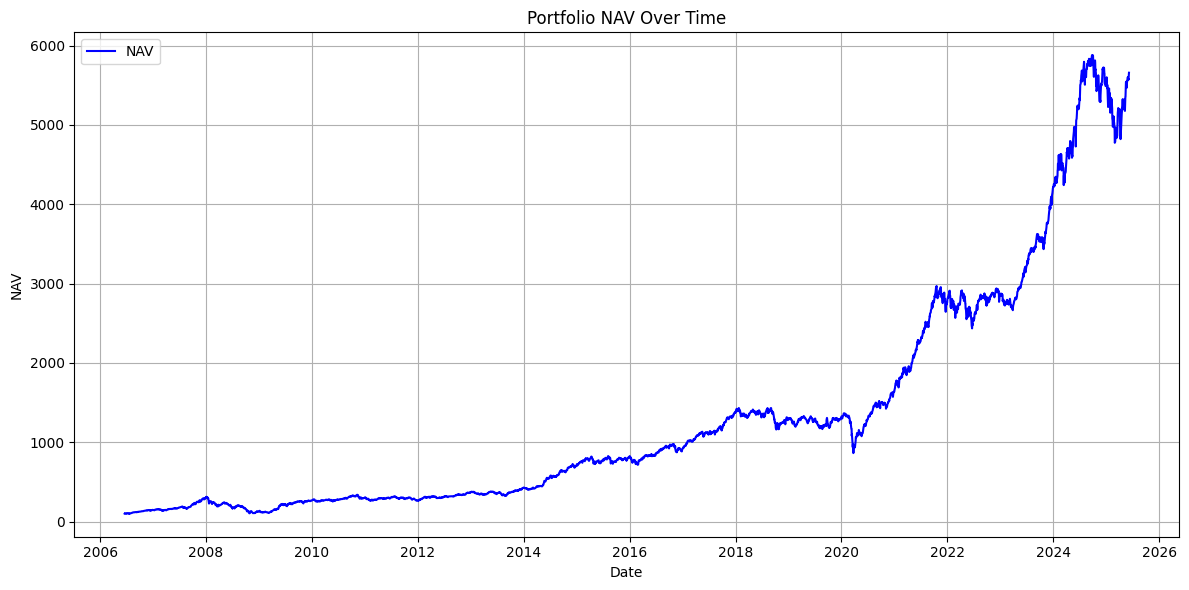

In [23]:
# Step 1: Compute NAV

# Step 2: Plot NAV
plt.figure(figsize=(12, 6))
plt.plot(rebased_series.index, rebased_series.values, label='NAV', color='blue')
plt.title('Portfolio NAV Over Time')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Convert benchmark date column to datetime
benchmark['Date'] = pd.to_datetime(benchmark['Date'])
benchmark = benchmark.set_index('Date').sort_index()
benchmark = benchmark.loc[rebased_series.index.min():rebased_series.index.max()]
benchmark_nav = (benchmark['Close'] / benchmark['Close'].loc[rebased_series.index.min()]) * 100
benchmark_nav = benchmark_nav[benchmark_nav.index.isin(rebased_series.index)]

# Match index
rebased_series = rebased_series[rebased_series.index.isin(benchmark_nav.index)]

# Benchmark stats
benchmark_returns = benchmark_nav.pct_change().dropna()
strategy_returns = rebased_series.pct_change().dropna()

# Ensure alignment
benchmark_returns = benchmark_returns.loc[strategy_returns.index]

# Relative Metrics
benchmark_cagr = (benchmark_nav.iloc[-1] / benchmark_nav.iloc[0])**(1 / years) - 1
benchmark_mdd = (benchmark_nav / benchmark_nav.cummax() - 1).min()
benchmark_vol = benchmark_returns.std() * np.sqrt(252)

# Add to summary_df
benchmark_summary = pd.DataFrame({
    'Metric': ['Benchmark CAGR', 'Benchmark Max Drawdown', 'Benchmark Volatility'],
    'Value': [benchmark_cagr, benchmark_mdd, benchmark_vol],
    'Period': 'Benchmark'
})
summary_df = pd.concat([summary_df, benchmark_summary], ignore_index=True)

# Rolling Returns (1Y, 3Y, 5Y)
rolling_windows = {'1Y': 252, '3Y': 252*3, '5Y': 252*5}
rolling_data = []

for label, window in rolling_windows.items():
    if len(rebased_series) > window:
        roll_strat = rebased_series.pct_change(periods=window).dropna()
        roll_bench = benchmark_nav.pct_change(periods=window).dropna()
        common_index = roll_strat.index.intersection(roll_bench.index)

        roll_alpha = roll_strat.loc[common_index] - roll_bench.loc[common_index]

        rolling_data += [
            {'Metric': f'{label} Rolling Return Mean', 'Value': roll_strat.loc[common_index].mean(), 'Period': 'Rolling'},
            {'Metric': f'{label} Rolling Return Median', 'Value': roll_strat.loc[common_index].median(), 'Period': 'Rolling'},
            {'Metric': f'{label} Rolling Alpha Mean', 'Value': roll_alpha.mean(), 'Period': 'Rolling'},
            {'Metric': f'{label} Rolling Alpha Median', 'Value': roll_alpha.median(), 'Period': 'Rolling'},
        ]

# Quarterly Positive and Alpha Quarters
quarterly_returns = strategy_returns.resample('Q').apply(lambda x: (1 + x).prod() - 1)
benchmark_quarters = benchmark_returns.resample('Q').apply(lambda x: (1 + x).prod() - 1)
common_quarters = quarterly_returns.index.intersection(benchmark_quarters.index)

q_positive = (quarterly_returns.loc[common_quarters] > 0).mean()
q_alpha = (quarterly_returns.loc[common_quarters] > benchmark_quarters.loc[common_quarters]).mean()

quarterly_metrics = [
    {'Metric': '% Positive Quarters', 'Value': q_positive, 'Period': 'Quarterly'},
    {'Metric': '% Quarters Alpha', 'Value': q_alpha, 'Period': 'Quarterly'}
]

# Combine all metrics
final_metrics = pd.concat([
    summary_df,
    pd.DataFrame(monthly_data),
    pd.DataFrame(rolling_data),
    pd.DataFrame(quarterly_metrics),
    cy_df_formatted[['Metric', 'Period', 'Value']],
    fy_df_formatted[['Metric', 'Period', 'Value']]
], ignore_index=True)

# Format Value column as percent
final_metrics['Value'] = final_metrics['Value'].apply(lambda x: f"{x:.2%}")
final_metrics


,Metric,Value,Period
0,CAGR,23.71%,Overall
1,Max Drawdown,-66.46%,Overall
2,Annualized Volatility,20.56%,Overall
3,Benchmark CAGR,12.27%,Benchmark
4,Benchmark Max Drawdown,-64.04%,Benchmark
...,...,...,...
59,FY Return,46.40%,2023
60,FY Return,-2.08%,2024
61,FY Return,63.33%,2025
62,FY Return,16.47%,2026


In [25]:
final_metrics.head(26)

,Metric,Value,Period
0,CAGR,23.71%,Overall
1,Max Drawdown,-66.46%,Overall
2,Annualized Volatility,20.56%,Overall
3,Benchmark CAGR,12.27%,Benchmark
4,Benchmark Max Drawdown,-64.04%,Benchmark
5,Benchmark Volatility,20.68%,Benchmark
6,1M Return,9.30%,Latest
7,2M Return,12.08%,Latest
8,3M Return,17.54%,Latest
9,6M Return,1.53%,Latest


In [26]:
def compute_strategy_metrics(master_date, new, df, strategy_start_date):
    master_date = master_date.sort_values(by='Date')
    portfolio = new.groupby("Date")["Symbol"].apply(list).reset_index()
    merged = pd.merge_asof(master_date, portfolio, on="Date")
    merged = merged.explode("Symbol").dropna(subset=["Symbol"])
    merged = merged[merged["Date"] >= '2006-06-06'].reset_index(drop=True)

    # Filter master_date to start from strategy_start_date
    filtered_dates = master_date[master_date['Date'] >= strategy_start_date]
    if filtered_dates.empty:
        return None  # Skip if no valid dates

    start_date_row = filtered_dates[filtered_dates['Date'] == strategy_start_date]
    selected_dates = filtered_dates.iloc[::21 * 13]
    selected_dates = pd.concat([start_date_row, selected_dates]).dropna().sort_values(by='Date')

    combined_dates_portfolio = merged[merged['Date'].isin(selected_dates['Date'])]

    df_reset = df.reset_index()
    merged = pd.merge(merged, df_reset[["Date", "Symbol", "returns"]], on=["Date", "Symbol"], how="left")

    nav = merged.groupby("Date")["returns"].mean()
    rebalance_dates = pd.to_datetime(selected_dates['Date']).tolist()
    nav.loc[nav.index.isin(rebalance_dates)] -= 0.03

    nav = (1 + nav).cumprod() * 100
    rebased_series = nav['2006-06-19':]
    if rebased_series.empty:
        return None  # Not enough data

    base_value = rebased_series.iloc[0]
    rebased_series = (rebased_series / base_value) * 100
    rebased_series = rebased_series.sort_index()
    daily_returns = rebased_series.pct_change().dropna()

    start_date = rebased_series.index[0]
    end_date = rebased_series.index[-1]
    years = (end_date - start_date).days / 365.25
    cagr = (rebased_series.iloc[-1] / rebased_series.iloc[0])**(1 / years) - 1
    rolling_max = rebased_series.cummax()
    drawdown = rebased_series / rolling_max - 1
    mdd = drawdown.min()
    volatility = daily_returns.std() * np.sqrt(252)

    return {
        'Start Date': strategy_start_date,
        'CAGR': cagr,
        'Max Drawdown': mdd,
        'Volatility': volatility
    }


# Get all trading dates from July to August 2009
valid_dates = master_date[(master_date['Date'] >= '2006-06-06') & (master_date['Date'] <= '2006-08-31')]
valid_start_dates = valid_dates['Date'].unique()

results = []

for start_date in valid_start_dates:
    metrics = compute_strategy_metrics(master_date, new, df, strategy_start_date=start_date)
    if metrics:
        results.append(metrics)

# Convert to DataFrame and sort by CAGR
results_df = pd.DataFrame(results)
top_5 = results_df.sort_values(by='CAGR', ascending=False).head(10)

# Format as percentages
top_5['CAGR'] = top_5['CAGR'].apply(lambda x: f"{x:.2%}")
top_5['Max Drawdown'] = top_5['Max Drawdown'].apply(lambda x: f"{x:.2%}")
top_5['Volatility'] = top_5['Volatility'].apply(lambda x: f"{x:.2%}")

top_5

NameError: name 'new' is not defined

In [ ]:
combined_dates_portfolio.to_csv('PortfolioG.csv,', index=False)

In [27]:
# Rebase benchmark NAV
benchmark_nav = benchmark['Close']
benchmark_nav = benchmark_nav[benchmark_nav.index >= '2006-06-19']
benchmark_nav = (benchmark_nav / benchmark_nav.iloc[0]) * 100
benchmark_nav = benchmark_nav.sort_index()

# Ensure rebased_series aligns
rebased_series = rebased_series[rebased_series.index.isin(benchmark_nav.index)]
benchmark_nav = benchmark_nav[benchmark_nav.index.isin(rebased_series.index)]

# Daily returns
strategy_returns = rebased_series.pct_change().dropna()
benchmark_returns = benchmark_nav.pct_change().dropna()
common_dates = strategy_returns.index.intersection(benchmark_returns.index)

# Performance metrics
def compute_metrics(nav, returns):
    start_date = nav.index[0]
    
    end_date = nav.index[-1]
    years = (end_date - start_date).days / 365.25

    cagr = (nav.iloc[-1] / nav.iloc[0])**(1 / years) - 1
    mdd = (nav / nav.cummax() - 1).min()
    volatility = returns.std() * np.sqrt(252)

    return cagr, mdd, volatility

strategy_cagr, strategy_mdd, strategy_vol = compute_metrics(rebased_series, strategy_returns)
benchmark_cagr, benchmark_mdd, benchmark_vol = compute_metrics(benchmark_nav, benchmark_returns)

# Side-by-side comparison
comparison_df = pd.DataFrame({
    'Metric': ['CAGR', 'Max Drawdown', 'Annualized Volatility'],
    'Strategy': [strategy_cagr, strategy_mdd, strategy_vol],
    'Benchmark': [benchmark_cagr, benchmark_mdd, benchmark_vol]
})
comparison_df['Alpha'] = comparison_df['Strategy'] - comparison_df['Benchmark']
comparison_df[['Strategy', 'Benchmark', 'Alpha']] = comparison_df[['Strategy', 'Benchmark', 'Alpha']].applymap(lambda x: f"{x:.2%}")

# Rolling return analysis
rolling_windows = {'1Y': 252, '3Y': 252*3, '5Y': 252*5}
rolling_data = []

for label, window in rolling_windows.items():
    if len(rebased_series) > window:
        strat_rolling_cagr = (rebased_series / rebased_series.shift(window)).dropna() ** (252 / window) - 1
        bench_rolling_cagr = (benchmark_nav / benchmark_nav.shift(window)).dropna() ** (252 / window) - 1

        common_idx = strat_rolling_cagr.index.intersection(bench_rolling_cagr.index)
        strat_rolling_cagr = strat_rolling_cagr.loc[common_idx]
        bench_rolling_cagr = bench_rolling_cagr.loc[common_idx]
        alpha = strat_rolling_cagr - bench_rolling_cagr

        rolling_data.extend([
            {'Metric': f'{label} Rolling CAGR Mean', 'Value': strat_rolling_cagr.mean(), 'Period': 'Rolling'},
            {'Metric': f'{label} Rolling CAGR Median', 'Value': strat_rolling_cagr.median(), 'Period': 'Rolling'},
            {'Metric': f'{label} Rolling Alpha Mean', 'Value': alpha.mean(), 'Period': 'Rolling'},
            {'Metric': f'{label} Rolling Alpha Median', 'Value': alpha.median(), 'Period': 'Rolling'}
        ])

# Positive quarters and alpha quarters
quarterly_strat = rebased_series.resample('Q').last().pct_change().dropna()
quarterly_bench = benchmark_nav.resample('Q').last().pct_change().dropna()

common_qtr = quarterly_strat.index.intersection(quarterly_bench.index)
quarterly_strat = quarterly_strat.loc[common_qtr]
quarterly_bench = quarterly_bench.loc[common_qtr]
quarterly_alpha = quarterly_strat - quarterly_bench

pos_quarters = (quarterly_strat > 0).mean()
pos_alpha_quarters = (quarterly_alpha > 0).mean()

pos_df = pd.DataFrame([
    {'Metric': '% Positive Quarters', 'Value': pos_quarters, 'Period': 'Quarterly'},
    {'Metric': '% Alpha Quarters', 'Value': pos_alpha_quarters, 'Period': 'Quarterly'}
])

# Monthly return metrics
monthly_periods = {
    '1M Return': 21,
    '2M Return': 42,
    '3M Return': 63,
    '6M Return': 126,
    '12M Return': 252,
    '24M Return': 504
}

monthly_data = []
for label, days_back in monthly_periods.items():
    if len(rebased_series) > days_back:
        ret = rebased_series.iloc[-1] / rebased_series.iloc[-days_back] - 1
        monthly_data.append({'Metric': label, 'Value': ret, 'Period': 'Latest'})

# Calendar Year Returns
cy_returns = rebased_series.resample('Y').last().pct_change().dropna()
cy_returns.index = cy_returns.index.year
cy_df = pd.DataFrame({'CY Return': cy_returns})
cy_df_formatted = cy_df.rename_axis('Year').reset_index()
cy_df_formatted['Metric'] = 'CY Return'
cy_df_formatted = cy_df_formatted.rename(columns={'Year': 'Period', 'CY Return': 'Value'})

# Financial Year Returns
fy_nav = rebased_series.copy()
fy_nav.index = fy_nav.index.to_period('M')
fy_ends = fy_nav.groupby(fy_nav.index.to_timestamp().to_period("A-MAR")).last()
fy_returns = fy_ends.pct_change().dropna()
fy_returns.index = fy_returns.index.year + 1
fy_df = pd.DataFrame({'FY Return': fy_returns})
fy_df_formatted = fy_df.rename_axis('Year').reset_index()
fy_df_formatted['Metric'] = 'FY Return'
fy_df_formatted = fy_df_formatted.rename(columns={'Year': 'Period', 'FY Return': 'Value'})

# Summary Metrics
summary_df = pd.DataFrame({
    'Metric': ['CAGR', 'Max Drawdown', 'Annualized Volatility'],
    'Value': [strategy_cagr, strategy_mdd, strategy_vol],
    'Period': 'Overall'
})

# Final metrics DataFrame
metrics_df = pd.concat([
    summary_df,
    pd.DataFrame(monthly_data),
    pd.DataFrame(rolling_data),
    pos_df,
    cy_df_formatted[['Metric', 'Period', 'Value']],
    fy_df_formatted[['Metric', 'Period', 'Value']]
], ignore_index=True)

metrics_df['Value'] = metrics_df['Value'].apply(lambda x: f"{x:.2%}")
comparison_df, metrics_df

(                  Metric Strategy Benchmark   Alpha
 0                   CAGR   23.62%    12.27%  11.35%
 1           Max Drawdown  -66.46%   -64.04%  -2.42%
 2  Annualized Volatility   20.56%    20.68%  -0.11%,
                    Metric    Value   Period
 0                    CAGR   23.62%  Overall
 1            Max Drawdown  -66.46%  Overall
 2   Annualized Volatility   20.56%  Overall
 3               1M Return    6.79%   Latest
 4               2M Return    8.43%   Latest
 ..                    ...      ...      ...
 56              FY Return   46.40%     2023
 57              FY Return   -2.08%     2024
 58              FY Return   63.33%     2025
 59              FY Return   16.47%     2026
 60              FY Return    7.28%     2027
 
 [61 rows x 3 columns])

In [28]:
comparison_df

,Metric,Strategy,Benchmark,Alpha
0,CAGR,23.62%,12.27%,11.35%
1,Max Drawdown,-66.46%,-64.04%,-2.42%
2,Annualized Volatility,20.56%,20.68%,-0.11%


In [29]:
metrics_df.head(25)

,Metric,Value,Period
0,CAGR,23.62%,Overall
1,Max Drawdown,-66.46%,Overall
2,Annualized Volatility,20.56%,Overall
3,1M Return,6.79%,Latest
4,2M Return,8.43%,Latest
5,3M Return,12.86%,Latest
6,6M Return,1.29%,Latest
7,12M Return,12.78%,Latest
8,24M Return,87.92%,Latest
9,1Y Rolling CAGR Mean,27.94%,Rolling


In [30]:
# Assuming nav is a pandas Series with Date as index
nav_df = nav.to_frame(name='GrowthDivDownvol')
nav_df

,GrowthDivDownvol
Date,
2006-06-19,98.869310
2006-06-20,97.581876
2006-06-21,99.888263
2006-06-22,101.413783
2006-06-23,101.832324
...,...
2025-06-02,5518.249241
2025-06-03,5506.481988
2025-06-04,5550.751276


In [18]:
nav_df.to_csv('GrowthDivDownvol.csv')

In [54]:
combined_dates_portfolio.to_csv('GrowthDivDownvolPortfolio2525.csv', index=False)

In [10]:
combined_dates_portfolio.to_csv('OnlyDiv.csv', index=False)

In [51]:
final_weights.to_csv('Trinity.csv', index=False)

In [24]:
sidport = combined_dates_portfolio.tail(300)
sidport.to_csv('PortfoliosTrinity.csv', index=False)

In [9]:
combined_dates_portfolio

,Date,Symbol
0,2006-06-19,HEG
1,2006-06-19,FINCABLES
2,2006-06-19,HAVELLS
3,2006-06-19,CRISIL
4,2006-06-19,INDORAMA
...,...,...
232095,2025-04-08,INDUSINDBK
232096,2025-04-08,WIPRO
232097,2025-04-08,HINDUNILVR
232098,2025-04-08,NTPC


In [32]:
churnDf = combined_dates_portfolio.groupby("Date")["Symbol"].apply(set).rename("Current").reset_index()
churnDf["Previous"] = churnDf["Current"].shift()
churnDf = churnDf.dropna()
churnDf["Churn"] = churnDf.apply(lambda x : len(x["Current"] - x["Previous"])/len(x["Previous"]), axis = 1)
churnDf["Churn"].mean()

np.float64(0.6454966443499789)

In [15]:
mean_churn = churnDf["Churn"].mean()

In [16]:
# Annualized churn (since rebalance freq = 21*13 trading days)
rebalance_period = 21*13
trading_days_per_year = 252
annualized_churn = mean_churn * (trading_days_per_year / rebalance_period)

print(f"Mean Churn per rebalance: {mean_churn:.2%}")
print(f"Annualized Churn: {annualized_churn:.2%}")

# Optional: Show churn_df

Mean Churn per rebalance: 60.71%
Annualized Churn: 56.04%


In [9]:
combined_dates_portfolio

,Date,Symbol
0,2006-06-19,HAVELLS
1,2006-06-19,CRISIL
2,2006-06-19,EIDPARRY
3,2006-06-19,SANOFI
4,2006-06-19,GHCL
...,...,...
232095,2025-04-08,SBIN
232096,2025-04-08,HDFCAMC
232097,2025-04-08,DABUR
232098,2025-04-08,CONCOR


In [49]:
SectorThemeGICS = pd.read_csv('Company Classification.csv')
X = pd.merge(combined_dates_portfolio, SectorThemeGICS[['Symbol', 'Sector']], left_on='Symbol', right_on='Symbol', how='left')
X

,Date,Symbol,Sector
0,2006-06-19,63MOONS,Information Technology
1,2006-06-19,ABB,Capital Goods
2,2006-06-19,ABIRLANUVO,NaN
3,2006-06-19,ABIRLANUVO,NaN
4,2006-06-19,ACC,Construction Materials
...,...,...,...
895,2025-04-08,TCS,Information Technology
896,2025-04-08,TECHM,Information Technology
897,2025-04-08,TORNTPHARM,Healthcare
898,2025-04-08,TORNTPHARM,Healthcare


<Figure size 1400x700 with 0 Axes>

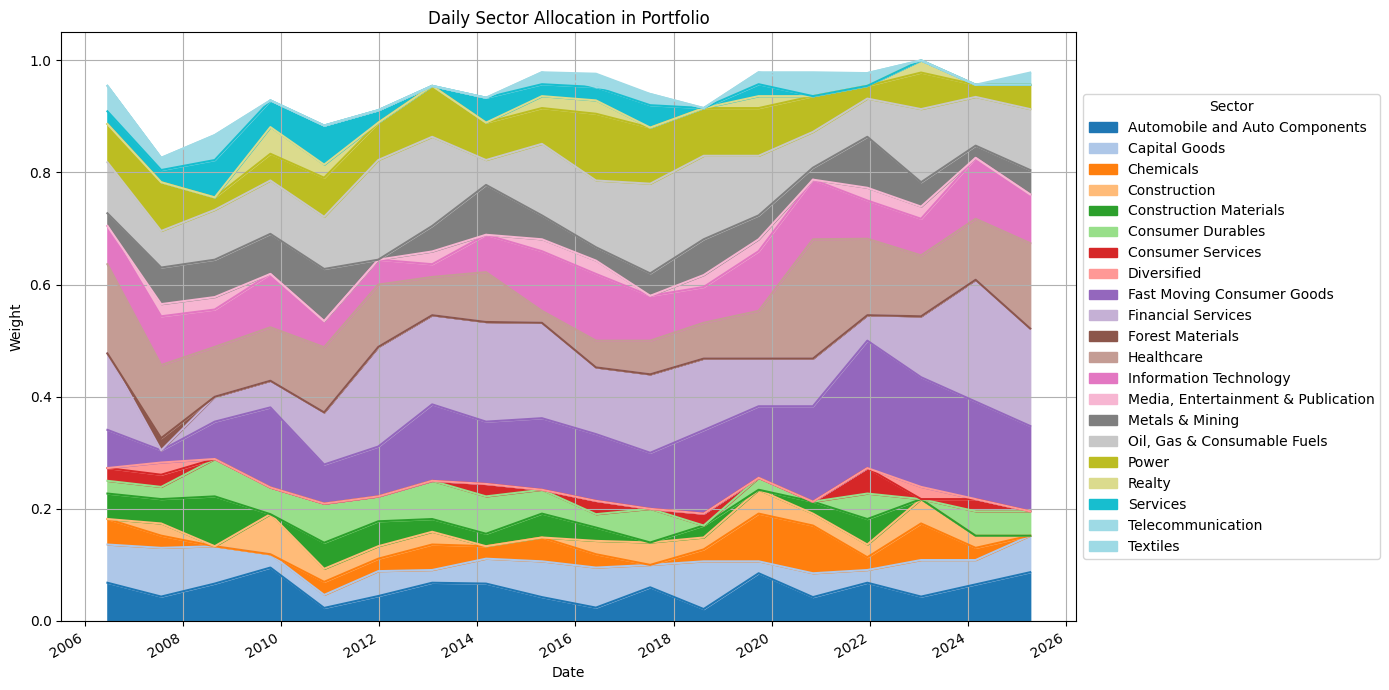

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Remove duplicates
X = X.drop_duplicates(subset=["Date", "Symbol"])

# Step 2: Assign equal weights per day
X['Weight'] = X.groupby('Date')['Symbol'].transform(lambda x: 1 / len(x))

# Step 3: Aggregate weights by sector per day
sector_mix = X.groupby(['Date', 'Sector'])['Weight'].sum().unstack(fill_value=0)

# Step 4: Plot the sector mix as a stacked area chart
plt.figure(figsize=(14, 7))
sector_mix.plot.area(stacked=True, figsize=(14, 7), cmap='tab20')
plt.title('Daily Sector Allocation in Portfolio')
plt.ylabel('Weight')
plt.xlabel('Date')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Sector')
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

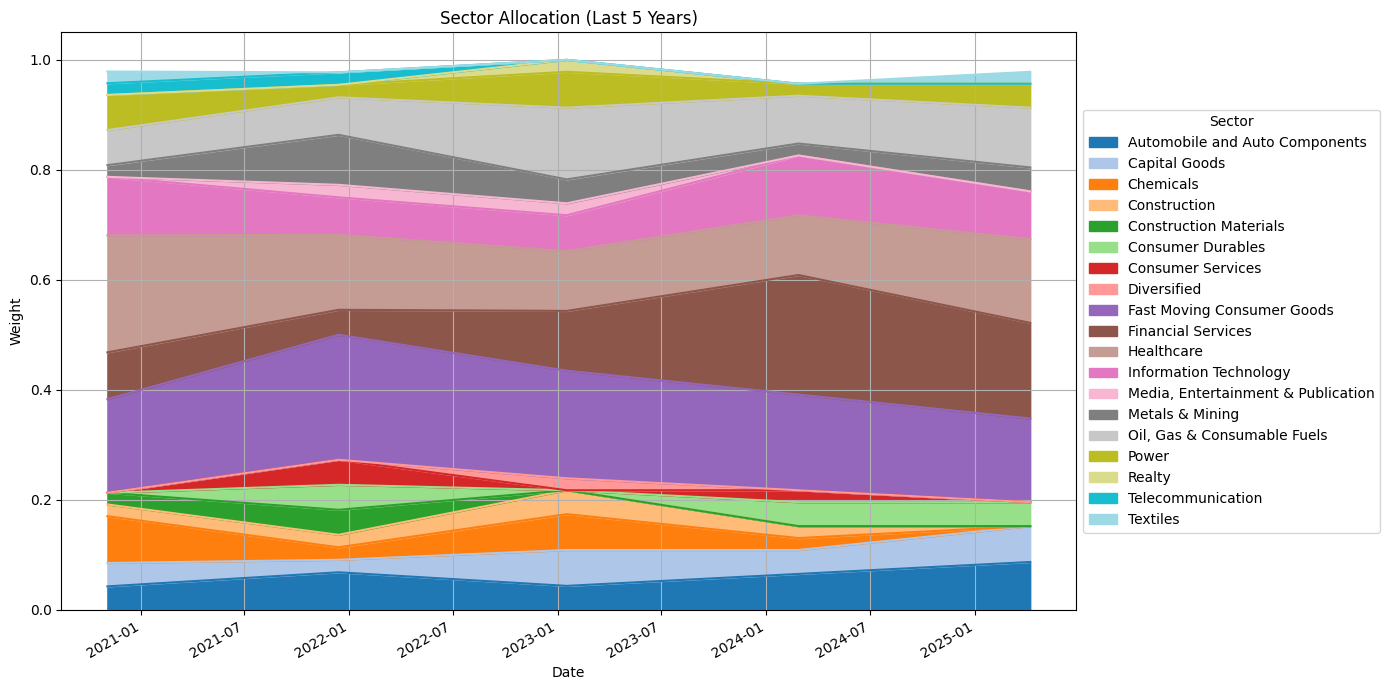

In [53]:

# Step 2: Filter last 5 years
cutoff = X['Date'].max() - pd.DateOffset(years=5)
df_last5 = X[X['Date'] >= cutoff]

sector_mix = df_last5.groupby(['Date', 'Sector'])['Weight'].sum().unstack(fill_value=0)

# Step 4: Plot stacked area chart
plt.figure(figsize=(14, 7))
sector_mix.plot.area(stacked=True, figsize=(14, 7), cmap='tab20')
plt.title('Sector Allocation (Last 5 Years)')
plt.ylabel('Weight')
plt.xlabel('Date')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Sector')
plt.tight_layout()
plt.show()

In [55]:
sector_mix_last5 = df_last5.groupby(['Date', 'Sector'])['Weight'].sum().unstack(fill_value=0)
sector_mix_last5

Sector,Automobile and Auto Components,Capital Goods,Chemicals,Construction,Construction Materials,Consumer Durables,Consumer Services,Diversified,Fast Moving Consumer Goods,Financial Services,Healthcare,Information Technology,"Media, Entertainment & Publication",Metals & Mining,"Oil, Gas & Consumable Fuels",Power,Realty,Telecommunication,Textiles
Date,,,,,,,,,,,,,,,,,,,
2020-11-03,0.042553,0.042553,0.085106,0.021277,0.021277,0.000000,0.000000,0.000000,0.170213,0.085106,0.212766,0.106383,0.000000,0.021277,0.063830,0.063830,0.000000,0.021277,0.021277
2021-12-13,0.068182,0.022727,0.022727,0.022727,0.045455,0.045455,0.045455,0.000000,0.227273,0.045455,0.136364,0.068182,0.022727,0.090909,0.068182,0.022727,0.000000,0.022727,0.000000
2023-01-17,0.043478,0.065217,0.065217,0.043478,0.000000,0.000000,0.000000,0.021739,0.195652,0.108696,0.108696,0.065217,0.021739,0.043478,0.130435,0.065217,0.021739,0.000000,0.000000
2024-02-27,0.065217,0.043478,0.021739,0.021739,0.000000,0.043478,0.021739,0.000000,0.173913,0.217391,0.108696,0.108696,0.000000,0.021739,0.086957,0.021739,0.000000,0.000000,0.000000
2025-04-08,0.086957,0.065217,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.152174,0.173913,0.152174,0.086957,0.000000,0.043478,0.108696,0.043478,0.000000,0.000000,0.021739


In [57]:
# Already grouped sector mix with dates as index and sectors as columns
# Transpose to get sectors as rows and dates as columns
sector_mix_transposed = sector_mix_last5.T

# View the transposed table
print(sector_mix_transposed.head())


Date                            2020-11-03  2021-12-13  2023-01-17  \
Sector                                                               
Automobile and Auto Components    0.042553    0.068182    0.043478   
Capital Goods                     0.042553    0.022727    0.065217   
Chemicals                         0.085106    0.022727    0.065217   
Construction                      0.021277    0.022727    0.043478   
Construction Materials            0.021277    0.045455    0.000000   

Date                            2024-02-27  2025-04-08  
Sector                                                  
Automobile and Auto Components    0.065217    0.086957  
Capital Goods                     0.043478    0.065217  
Chemicals                         0.021739    0.000000  
Construction                      0.021739    0.000000  
Construction Materials            0.000000    0.000000  


In [59]:
# Convert weights to percentages
sector_mix_transposed_pct = sector_mix_last5.T * 100
sector_mix_transposed_pct


Date,2020-11-03,2021-12-13,2023-01-17,2024-02-27,2025-04-08
Sector,,,,,
Automobile and Auto Components,4.255319,6.818182,4.347826,6.521739,8.695652
Capital Goods,4.255319,2.272727,6.521739,4.347826,6.521739
Chemicals,8.510638,2.272727,6.521739,2.173913,0.000000
Construction,2.127660,2.272727,4.347826,2.173913,0.000000
Construction Materials,2.127660,4.545455,0.000000,0.000000,0.000000
Consumer Durables,0.000000,4.545455,0.000000,4.347826,4.347826
Consumer Services,0.000000,4.545455,0.000000,2.173913,0.000000
Diversified,0.000000,0.000000,2.173913,0.000000,0.000000
Fast Moving Consumer Goods,17.021277,22.727273,19.565217,17.391304,15.217391


In [18]:
final_weights.to_csv('TrinityValue13M.csv', index=False)

In [11]:
combined_dates_portfolio.to_csv('Top250Div.csv', index=False)